<a href="https://colab.research.google.com/github/soumyanamboo/Machine-Learning-Techniques/blob/main/Week4_Lease_SquareClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lease Square Classification
* Lease Square Classification is used for estimating parameters of Discriminant function from the given training data.  
* Lease Square Classification adapts linear regression model for classification.  
  * It uses lease square error as loss function.  
  * It uses normal equation methos and Gradient Descent for estimating model parameters or weight vector.
* Since it is a classification algorithm, we would use classification related evaluation metrics such as precision, recall, F-1 Score, AUC ROC/PR and accuracy.
* We make use of polynomial feature transformation to obtain new features and then make use of that representation to learn non-linear decision boundaries between classes.   
$$ y = w_0 + W^T 𝝫(x)   $$  
where $𝝫(x)$ is a polynomial feature transformation.
* We can tackle the issue of overfitting by using Ridge or Lasso Regularization just like linear regression model.

In [ ]:
# Import Libraries:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import functools
import seaborn as sns
import math

In [ ]:
#@title [Implementation of Linear Regression class]

class LinReg():
  ''' Linear Regression Model class definition
      y = X@w
      X: feature matrix
      w: weight vector
      y: label vector
  '''
  def __init__(self):
    self.t0 = 20
    self.t1 = 100
  
  def predict(self, X:np.ndarray):
    ''' Args:
          X: feature matrix
        Returns:
          y: label vector predicted by the given model
    '''
    y = X@self.w
    return y
  
  def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Calculates loss for a model based on known labels.
        Args:
          X: feature matrix
          y: label vector
          reg_rate: regularization rate
        Returns:
          Loss 
    '''
    e = y - self.predict(X)
    return (1/2) * np.transpose(e)@e
    # return (1/2) * np.transpose(e)@e + (reg_rate/2)*np.transpose(self.w)@self.w
  
  def rmse(self, X:np.ndarray, y:np.ndarray):
    ''' Calculates root mean squared error of prediction w.r.t actual label
        Args:
          X: feature matrix
          y: label vector
        Returns:
          Loss
    '''
    return np.sqrt((2/X.shape[0])* self.loss(X,y,0))
  
  def fit(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Estimate parameters of linear regression model w.r.t known labels.
        Args:
          X: feature matrix
          y: label vector
          reg_rate: rate of regression
        Returns:
          weight vector
    '''
    self.w = np.zeros(X.shape[1])
    eye = np.eye(np.size(X,1))
    self.w = np.linalg.solve(reg_rate*eye + X.T@X, X.T@y)
    return self.w
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Calculates the gradient of loss function w.r.t weight vector
        Args:
          X: feature matrix
          y: label vector
          reg_rate: rate of regression
        Returns:
          gradient vector
    '''
    grad = np.transpose(X) @ (self.predict(X) - y) + reg_rate * self.w
    return grad
  
def update_weights(self, grad:np.ndarray, lr:float):
  ''' updates the weights based on the gradient of loss function
      w_new = w_old - lr * grad
      Args:
        grad: gradient of loss w.r.t w
        lr: learning rate
      Returns:
      updated weight vector
  '''
  w_new = self.w - lr * grad
  return w_new

def learning_schedule(self, t):
  return (self.t0/(t + self.t1))

def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float,reg_rate:float):
  ''' Estimates parameter of linear regression model using gradient descent
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        lr: learning rate
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
  '''
  self.w = np.zeros(X.shape[1])
  self.w_all = []
  self.err_all = []
  for i in np.arange(0, num_epochs):
    
    self.w_all.append(self.w)
    self.err_all.append(self.loss(X,y,0))
    
    grad = self.calculate_gradient(X,y,reg_rate)
    self.w = self.update_weights(grad,lr)
  return self.w

def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int, reg_rate:float):
  ''' Estimates parameter of linear regression model using MBGD
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        batch_size: number of examples in a batch
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
  '''
  self.w = np.zeros(X.shape[1])
  self.w_all = []
  self.err_all = []
  mini_batch_id = 0

  for epoch in range(num_epochs):
    shuffled_indices = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, X.shape[0],batch_size):
      mini_batch_id += 1
      xi = X_shuffled[i:i+batch_size]
      yi = y_shuffled[i:i+batch_size]
      self.w_all.append(self.w)
      self.err_all.append(self.loss(xi,yi,0))

      grad = (2/batch_size) * self.calculate_gradient(X,y,reg_rate)
      lr = self.learning_schedule(mini_batch_id)
      self.w = self.update_weights(grad,lr)
  return self.w

def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, reg_rate:float):
  ''' Estimates parameter of linear regression model using Stochastic GD
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
  '''
  self.w = np.zeros(X.shape[1])
  self.w_all = []
  self.err_all = []

  for epoch in range(num_epochs):
    for i in range(0, X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]

      self.w_all.append(self.w)
      self.err_all.append(self.loss(xi,yi,0))

      grad = 2 * self.calculate_gradient(X,y,reg_rate)
      lr = self.learning_schedule(epoch *X.shape[0] + i)
      self.w = self.update_weights(grad,lr)
  return self.w


In [ ]:
# @title [polynomial transformation]
def get_combinations(x, degree):
  return itertools.combinations_with_replacement(x, degree)

def compute_new_feature(items):
  return functools.reduce(lambda x, y: x*y, items) 

def polynomial_transform(x, degree, logging=False):
  #convert feature to matrix
  if(x.ndim ==1):
    x = x[:,None]
  x_t = x.transpose()   # transpose of feature matrix
  features = [np.ones(len(x))] # populates 1's as first feature of each example
  if(logging):
    print('Input: ',x)

  for degree in range(1, degree + 1):
    for items in get_combinations(x_t,degree):  # generate combinations 
      features.append(compute_new_feature(items))  # combine features into new feature
      if(logging):
        print(items, ' : ', compute_new_feature(items))
  if(logging):
    print(np.asarray(features).transpose())
  return np.asarray(features).transpose()

In [ ]:
# @title [create non linear training set]
def non_linear_training_set(func, sample_size, std):
  x = np.linspace(0,1,sample_size)
  y = func(x) + np.random.normal(scale=std,size=x.shape)
  return x, y

def nonlin(x):
  return np.sin(2 * np.pi * x)

In [ ]:
# @title [model selection]
def convert_dict_to_df(w_dict, degree):
  poly_w_dict = {i:np.array(np.zeros(degree)) for i in range(degree)}
  for deg in poly_w_dict:
    weight_vector = w_dict[deg]
    for i in range(len(weight_vector)):
      poly_w_dict[deg][i] = weight_vector[i]
    
  poly_w_df = pd.DataFrame(poly_w_dict)
  poly_w_df.columns = ['w_'+str(i) for i in range(degree)]
  return poly_w_df

def plot_model_selection(training_errors, val_errors):
  plt.plot(training_errors,'o-',mfc='none',mec='b',ms=10,label='training errors')
  plt.plot(val_errors,'o-',mfc='none',mec='r',ms=10,label='velidation errors')
  plt.legend()
  plt.xlabel('degree')
  plt.ylabel('RMSE')
  plt.show()

In [ ]:
# @title [plot model selection]
training_errors = []
val_errors = []
w_dict = {}
x_val = np.linspace(0,1,100)
y_val = nonlin(x_val) +np.random.normal(scale=0.25,size=(len(x_val)))
for i in range(10):
  x_transform = polynomial_transform(x,i)
  x_val_transform = polynomial_transform(x_val,i)
  lin_reg = LinReg()
  lin_reg.fit(x_transform,y,0)

  w_dict[i] = lin_reg.w
  training_errors.append(lin_reg.rmse(x_transform, y))
  val_errors.append(lin_reg.rmse(x_val_transform, y_val))
plot_model_selection(training_errors,val_errors)
convert_dict_to_df(w_dict,10)

NameError: ignored

## Label Encoding:  
Since the label y is a discrete quantity, we use one-hot encoding represent label.  
For a binary classification,
* The label 0 is represented with [1,0]
* The label 1 is represented with [0,1]   
The same scheme can be extended to the **multi-class setting**. In general, for a k-class set up, we use one hot encoding in k component vector. $[y_0,y_1,...,y_k]$. For label 1 <= r <= k, $y_r$ would be 1 and other components would be 0.  
For 3-class set-up, 
* The label 0 is represented with [1, 0, 0]
* The label 1 is represented with [0, 1, 0]
* The label 2 is represented with [0, 0, 1]

In [ ]:
class LabelTransformer(object):
  ''' Label encoder - decoder
      Attributes:
        n_classes: int
          --> no of classes - k
  '''
  def __init__(self, n_classes:int=None):
    self.n_classes = n_classes
  
  @property
  def n_classes(self):
    return self.__n_classes
  
  @n_classes.setter
  def n_classes(self, K):
    self.__n_classes = K
    self.__encoder = None if K is None else np.eye(K)
  
  @property
  def encoder(self):
    return self.__encoder
  
  def encode(self, class_indices:np.ndarray):
    ''' Encode class index into one-of-k code
        Parameters:
          class_indices: (N,) np.ndarray
          non negative class index. elements must be integer in [0, n_classes]
        Returns:
          (N,K): ndarray - one-of-k encoding of input
    '''
    if self.n_classes is None:
      self.n_classes = np.max(class_indices) + 1
    return self.encoder[class_indices]
  
  def decode(self, onehot:np.ndarray):
    ''' decode one-of-k class into class index
        Parameters:
          onehot: (N,K) np.ndarray - one-of-k code
        Returns:
          (N,) np.ndarray - class index
    '''
    return np.argmax(onehot,axis=1)  

In [ ]:
binary_labels = LabelTransformer(2).encode(np.array([1,0,1,0]))
binary_labels
#LabelTransformer(2).decode(np.array([[1,0,1,0]]))

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

# Least Square Classification Implimentation  
## Training Data
This representation of label has an impact on the learning set-up.
* A feature matrix of shape (n,m) where n is the number of examples and m is the number of features
* A label Matrix Y of shane (n,k) where k is the number of class labels. This set up is similar to multi-label regression.
## Model
The label matrix is obtained by multiplication of feature matrix and weight matrix. After adding a dummy feature to feature matrix, its shape becomes (n,m+1).
$$ Y_{(n,k)} = X_{(n,m+1)} W_{(m+1,k)}  $$
There is one weight vector per output. Hence total number of parameters to be estimated = (m+1, k).  
## Loss Function
Loss Matrix of shape (k,k):
$$ J(w) = \frac{1}{2} (Y_{(n,k)} - X_{(n,m+1)} W_{(m+1,k)})^T (Y_{(n,k)} - X_{(n,m+1)} W_{(m+1,k)}) + \frac{λ}{2} W^TW  $$ 
$$ = \frac{1}{2} (E)^T_{(k,n)}E_{(n,k)} + \frac{λ}{2} W^TW_{(k,k)} $$

**Normal Equation:**
There is almost no code change needed for the ***fit*** function that uses normal equation method for parameter or weight vector estimation.
$$W = (X^TX + λ I)^{-1} X^TY$$

## Iterative Optimization (GD, MBGD, SGD)
The gradient calculation ***calculate_gradient*** for iterative optimization is as follows:
$$ \frac{DJ(w)}{D(W)} = X^T(XW - Y) + λW $$
New value of W is calculated in vector form as:
$$ W^{(new)} := W^{(old)} - α \frac{DJ(w)}{D(W)}  $$

**Inference**
The predict function for this classification function is expected to return a discrete quantity  
* We return the class label for the largest value of linear combination of features among all classes



In [ ]:
class LeastSquareClassification():
  ''' LSC Model:
        y: np.where(X@W >=0, 1, 0)
        X: a feature matrix
        w: weight vector
        y: label vector
  '''
  def __init__(self):
    self.t0 = 20
    self.t1 = 100
  
  def predict(self, X:np.ndarray):
    ''' Prediction of output label for a given input
        Arguments:
          X:feature matrix
        Returns:
          y: label vector
    '''
    # check to make sure that shapes are compatible
    assert X.shape[-1] == self.w.shape[0], f"X shape {X.shape} and w shape {self.w.shape} are not compatible"
    print('predict: ',np.argmax(X@self.w, axis=-1), 'y_hat: ',(X@self.w).shape)
    return np.argmax(X@self.w, axis=-1)
  
  def predict_internal(self, X:np.ndarray) -> np.ndarray:
    ''' Prediction of output label for a given input
        Arguments:
          X:feature matrix
        Returns:
          y: label vector
    '''
    # check to make sure that shapes are compatible
    assert X.shape[-1] == self.w.shape[0], f"X shape {X.shape} and w shape {self.w.shape} are not compatible"
    return X@self.w
######################################################
####             same as LinReg Class              ###
######################################################
  def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Calculates loss for a model based on known labels.
        Args:
          X: feature matrix
          y: label vector
          reg_rate: regularization rate
        Returns:
          Loss 
    '''
    e = y - self.predict_internal(X)
    return (1/2) * np.transpose(e)@e
    # return (1/2) * np.transpose(e)@e + (reg_rate/2)*np.transpose(self.w)@self.w
  
  def rmse(self, X:np.ndarray, y:np.ndarray):
    ''' Calculates root mean squared error of prediction w.r.t actual label
        Args:
          X: feature matrix
          y: label vector
        Returns:
          Loss
    '''
    return np.sqrt((2/X.shape[0])* self.loss(X,y,0))
  
  def fit(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Estimate parameters of linear regression model w.r.t known labels.
        Args:
          X: feature matrix
          y: label vector
          reg_rate: rate of regression
        Returns:
          weight vector
    '''
    self.w = np.zeros(X.shape[1])
    eye = np.eye(np.size(X,1))
    self.w = np.linalg.solve(reg_rate*eye + X.T@X, X.T@y)
    return self.w
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Calculates the gradient of loss function w.r.t weight vector
        Args:
          X: feature matrix
          y: label vector
          reg_rate: rate of regression
        Returns:
          gradient vector
    ''' 
    y_hat = self.predict_internal(X)
    print('Calculate_gradient:',y_hat.shape, y.shape)
    grad = np.transpose(X) @ (y_hat - y) + reg_rate * self.w
    #grad = np.transpose(X) @ (self.predict_internal(X) - y) + reg_rate * self.w
    return grad
  
  def update_weights(self, grad:np.ndarray, lr:float):
    ''' updates the weights based on the gradient of loss function
        w_new = w_old - lr * grad
       Args:
          grad: gradient of loss w.r.t w
          lr: learning rate
        Returns:
        updated weight vector
    '''
    w_new = self.w - lr * grad
    return w_new

  def learning_schedule(self, t):
    return (self.t0/(t + self.t1))

  def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float,reg_rate:float):
    ''' Estimates parameter of linear regression model using gradient descent
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        lr: learning rate
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
    '''
    self.w = np.zeros(X.shape[1])
    self.w_all = []
    self.err_all = []
    for i in np.arange(0, num_epochs):
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,0))
    
      grad = self.calculate_gradient(X,y,reg_rate)
      self.w = self.update_weights(grad,lr)
    return self.w

  def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int, reg_rate:float):
    ''' Estimates parameter of linear regression model using MBGD
     Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        batch_size: number of examples in a batch
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
    '''
    self.w = np.zeros(X.shape[1])
    self.w_all = []
    self.err_all = []
    mini_batch_id = 0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0, X.shape[0],batch_size):
        mini_batch_id += 1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi,0))

        grad = (2/batch_size) * self.calculate_gradient(X,y,reg_rate)
        lr = self.learning_schedule(mini_batch_id)
        self.w = self.update_weights(grad,lr)
    return self.w

  def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, reg_rate:float):
    ''' Estimates parameter of linear regression model using Stochastic GD
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
    '''
    self.w = np.zeros(X.shape[1])
    self.w_all = []
    self.err_all = []

    for epoch in range(num_epochs):
      for i in range(0, X.shape[0]):
        random_index = np.random.randint(X.shape[0])
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi,0))

        grad = 2 * self.calculate_gradient(X,y,reg_rate)
        lr = self.learning_schedule(epoch *X.shape[0] + i)
        self.w = self.update_weights(grad,lr)
    return self.w

# Least Square Classification Setup:
1. Linearly separable binary classification setup.
2. Linearly separable binary classification setup with a few outlier points.
3. Multi-class classification with k=3.
4. Polynomial least squares classification.

Create a sample datasetfor binary classification with no of samples n=50.
* It also has the facility to add outlier to generated dataset.
* It can generate samples from multiple classes (>2).


In [ ]:
from numpy.core.multiarray import concatenate
#@title [create toy dataset]
def create_toy_data(add_outliers=False,add_class=False):
  x0 = np.random.normal(size=50).reshape(-1,2) - 1
  x1 = np.random.normal(size=50).reshape(-1,2) + 1
  if add_outliers:
    x_1 = np.random.normal(size=10).reshape(-1,2) + np.array([5., 10.])
    return np.concatenate([x0,x1,x_1]), np.concatenate([np.zeros(25),np.ones(30),]).astype(int)
  if add_class:
    x2 = np.random.normal(size=50).reshape(-1,2) + 2
    return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2+np.zeros(25)]).astype(int)
  return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(int)

In [ ]:
sample1 = create_toy_data()
sample2=create_toy_data(add_outliers=True)
sample3=create_toy_data(add_class=True)
sample4 = create_toy_data(add_outliers=True, add_class=True)
print(sample1[0][:5])
print(sample2[0][:5])
print(sample3[0][:5])
print(sample4[0][:5])

[[ 0.50726948 -1.25582697]
 [-0.48481253  0.53908622]
 [ 0.81045182 -0.25130705]
 [-0.96645568 -1.37668556]
 [-1.52664992 -1.19592317]]
[[ 0.14157733 -1.75079347]
 [ 0.13373891 -0.05043549]
 [-0.37831757 -2.48928746]
 [-2.12493464 -3.09027953]
 [ 0.00321596  0.6084744 ]]
[[-2.15630609  0.38934832]
 [-2.57137657 -1.41288205]
 [-0.42742697 -1.53641783]
 [-1.46044661 -2.72407562]
 [-1.25664772 -2.00107278]]
[[ 0.06664937 -1.31735615]
 [-0.7507121  -1.80746791]
 [-1.14960477 -0.37457466]
 [-0.04159817 -1.42790168]
 [-0.12855715 -1.18466524]]


##Preprocessing Steps:
1. Generate synthetic data by calling create_toy_data function
2. Perform polynomial transformation(default degree=1) on feature set.
3. Divide the data set into Train and evaluation sets with train_test_split api from sklearn library
4. Perform Label transformation for both train and test sets.

In [ ]:
#@title [Data Preprocessing]

from sklearn.model_selection import train_test_split

def preprocess(add_class=False,add_outliers=False,degree=1):
  x, y = create_toy_data(add_outliers,add_class)
  x_poly = polynomial_transform(x, degree=degree)
  x_train, x_test, y_train, y_test = train_test_split(x_poly, y)
  y_train_trans = LabelTransformer().encode(y_train)
  y_test_trans = LabelTransformer().encode(y_test)
  return x_train, x_test, y_train, y_test, y_train_trans, y_test_trans  

In [ ]:
#@title [model visualization]
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

def visualize_model(x_train, labels, lsc_obj, degree=1):
  f = plt.figure(figsize=(8,8))
  
  #compute xlim and ylim
  x1_min = np.min(x_train[:,1])
  x1_max = np.max(x_train[:,1])
  x2_min = np.min(x_train[:,2])
  x2_max = np.max(x_train[:,2])
  x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
  x_test = np.array([x1_test, x2_test]).reshape(2,-1).T
  x_test_poly = polynomial_transform(x_test, degree=degree)
  y_test = lsc_obj.predict(x_test_poly)

  print(y_test.shape)

  sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2], hue=labels)
  plt.contourf(x1_test, x2_test, y_test.reshape(100,100),alpha=0.5, levels=np.linspace(0,1,3))
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)
  plt.gca().set_aspect('equal',adjustable='box')
  plt.show()

#Linearly Separable binary classification

In [ ]:
x1_train, x1_test, y1_train, y1_test, y1_train_trans, y1_test_trans = preprocess()
print('shape of training feature matrix', x1_train.shape)
print('shape of training label vector', y1_train.shape)

print('shape of test feature matrix', x1_test.shape)
print('shape of test label vector', y1_test.shape)
print(y1_test)

shape of training feature matrix (37, 3)
shape of training label vector (37,)
shape of test feature matrix (13, 3)
shape of test label vector (13,)
[1 0 0 1 1 1 0 0 1 0 1 1 0]


**Visualize the dataset:**

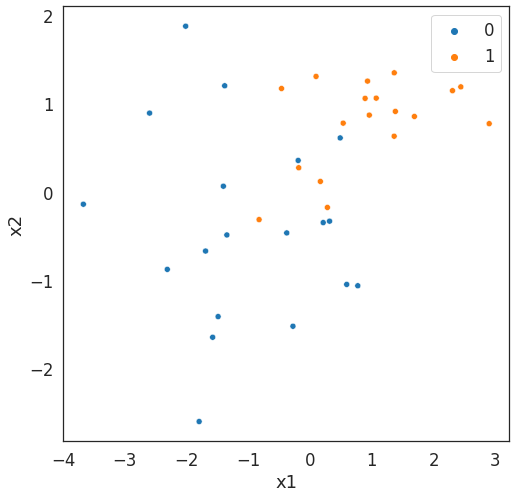

In [ ]:
sns.set_style("white")
f = plt.figure(figsize=(8,8))
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})
sns.scatterplot(data=x1_train, x=x1_train[:,-2], y= x1_train[:,-1],hue=y1_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
lsc = LeastSquareClassification()

Normal Equation:

weight vector: [[ 0.5324894   0.4675106 ]
 [-0.17485051  0.17485051]
 [-0.18151776  0.18151776]]
predict:  [0 0 0 ... 1 1 1] y_hat:  (10000, 2)
(10000,)


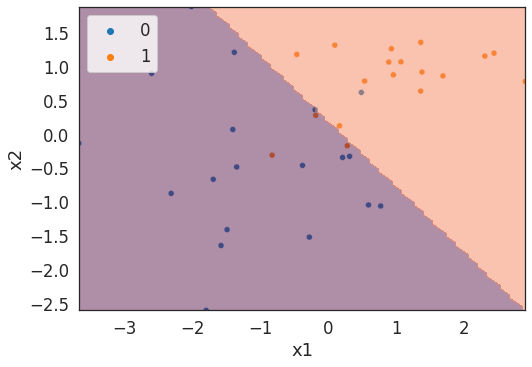

In [ ]:
lsc.fit(x1_train, y1_train_trans, reg_rate=0)
print('weight vector:', lsc.w)
#print(x1_train)
#print(y1_train)
visualize_model(x1_train,y1_train, lsc)

**Plot Learning Curve**

In [ ]:
def plot_learning_curve(err_all):
  err = [err[1][1] for err in err_all]
  plt.plot(np.arange(len(err_all)),err,'r-')
  plt.xlabel('Iter #')
  plt.ylabel('J(w)')

In [ ]:
lsc.sgd(x1_train, y1_train_trans,num_epochs=100,reg_rate=0)
plot_learning_curve(lsc.err_all)

predict:  0 y_hat:  (1,)
predict:  0 y_hat:  (37,)
Calculate_gradient: () (37, 2)
predict:  0 y_hat:  (37,)


ValueError: ignored